# SnowHow forcing data


Imports

In [11]:
# -*- coding: utf-8 -*-
%matplotlib inline
from __future__ import print_function
import pylab as plt
import netCDF4
import datetime
import numpy as np
plt.rcParams['figure.figsize'] = (16, 5)

##Loading data sets

In [50]:
precip_f = r"..\Test\Data\snowhow_pilot\seNorge_v2_0_PREC1h_grid_2015011221_2015011221.nc"
precip_mf = r"..\Test\Data\snowhow_pilot\seNorge_v2_0_PREC1h_grid_*.nc"

temp_f = r"..\Test\Data\snowhow_pilot\seNorge_v2_0_TEMP1h_grid_2015011221.nc"

snowrain_f = r"..\Test\Data\snowhow_pilot\snowrain_only_2015011221.nc"

forc_obs_f = r"..\Test\Data\FORCING_obsgrid.nc"
forc_arome_f = r"..\Test\Data\FORCING_arome.nc"
# Is not the forcing file - CHANGE!!!
arome_f = r"..\Test\Data\snowhow_pilot\har25_00_20150112.nc"

In [79]:
precip_nc = netCDF4.Dataset(precip_f, 'r')
temp_nc = netCDF4.Dataset(temp_f, 'r')
snowrain_nc = netCDF4.Dataset(snowrain_f, 'r')
forc_arome_nc = netCDF4.Dataset(forc_arome_f, 'r')
forc_obs_nc = netCDF4.Dataset(forc_obs_f, 'r')
arome_nc = netCDF4.Dataset(arome_f, 'r')
precip_v = precip_nc.variables['precipitation_amount'] ## mm
temp_v = temp_nc.variables['temperature'] ## Celsius
snowrain_v = snowrain_nc.variables['precipitation_amount']

forc_rainf_obs_v = forc_obs_nc.variables["Rainf"]

lat_obs = forc_obs_nc.variables["LAT"][:]
lon_obs = forc_obs_nc.variables["LON"][:]
time_obs = forc_obs_nc.variables["time"][:]

forc_rainf_arome_v = forc_arome_nc.variables["Rainf"]

lat_arome = forc_arome_nc.variables["LAT"][:]
lon_arome = forc_arome_nc.variables["LON"][:]
time_arome = forc_arome_nc.variables["time"][:]

# setting indicies
X = 45
Y = 1185
N_arome = 21
N_forc = 35600

In [80]:
forc_rainf_arome = forc_rainf_arome_v[:].squeeze() # kg/m2 = mm

forc_rainf_obs = forc_rainf_obs_v[:].squeeze() # kg/m2 = mm

forc_time_arome = netCDF4.num2date(forc_arome_nc.variables["time"][:], forc_arome_nc.variables["time"].units)

forc_diff = forc_rainf_obs - forc_rainf_arome

IndexError: too many indices for array

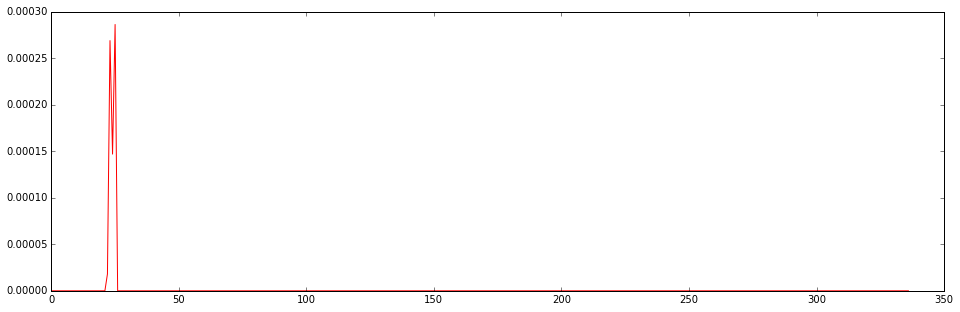

In [83]:
plt.plot(forc_rainf_obs[:, N_forc], color='r', label="Rain fall (OBS): {0}".format(time_obs))
plt.hold(True)
plt.plot(forc_time_arome[:, N_forc], color='b', label="Rain fall (AROME): {0}".format(time_arome))
plt.plot(forc_diff[:, N_forc], color='k', label="Diff. Froc. OBS-AROME: {0}".format(time_arome))

In [69]:
time_v = precip_nc.variables['time']
t_p = netCDF4.num2date(time_v[0], time_v.units)
time_v = temp_nc.variables['time']
t_t = netCDF4.num2date(time_v[0], time_v.units)

if t_t == t_p:
    print("Time matches")
else:
    print("Time mismatch")

Time matches


In [58]:
rainf_arome_v = arome_nc.variables["precipitation_amount_acc"]
rainf_arome = rainf_arome_v[:].squeeze() # kg/m2 = mm

snowf_arome_v = arome_nc.variables["lwe_thickness_of_snowfall_amount_acc"]
snowf_arome = rainf_arome_v[:].squeeze() # kg/m2 = mm

time_arome = netCDF4.num2date(arome_nc.variables["time"][:], arome_nc.variables["time"].units)

precip = precip_v[:].squeeze() #/ 3600.0
snowrain = snowrain_v[:].squeeze()



temp = temp_v[:].squeeze()
rainf = np.ma.masked_where((temp <= 0.5), precip)
snowf = np.ma.masked_where((temp > 0.5), precip)

diff = rainf - snowrain.data

In [59]:
print(np.ma.max(snowrain))
print(np.ma.max(rainf))

4.80504894257
4.80505


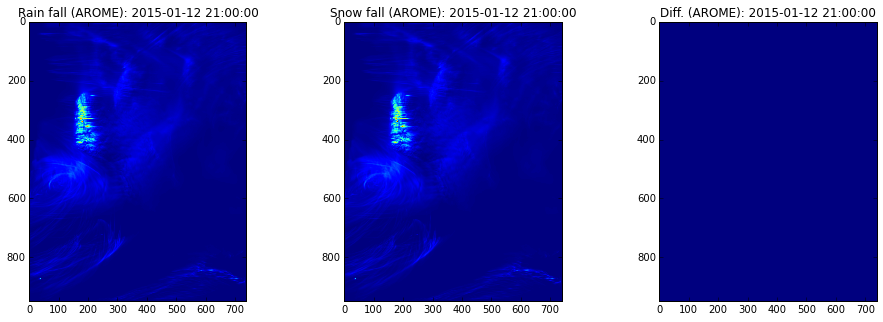

In [60]:
f, (ax_rf, ax_sf, ax_rf_sf) = plt.subplots(1, 3)
ax_rf.imshow(rainf_arome[N_arome, :, :])
ax_rf.set_title("Rain fall (AROME): {0}".format(time_arome[N_arome]))
#plt.colorbar()
ax_sf.imshow(snowf_arome[N_arome, :, :])
ax_sf.set_title("Snow fall (AROME): {0}".format(time_arome[N_arome]))
#plt.colorbar()
ax_rf_sf.imshow(rainf_arome[N_arome, :, :] - snowf_arome[N_arome, :, :])
ax_rf_sf.set_title("Diff. (AROME): {0}".format(time_arome[N_arome]))

Parameters "" and "" are equal for the timestamp used.

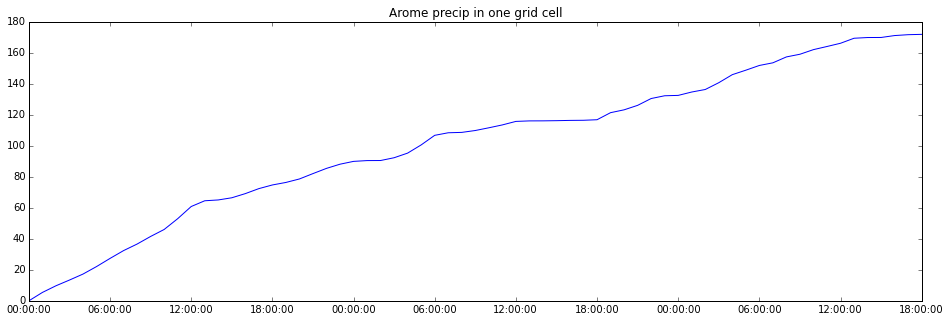

In [61]:
plt.plot(time_arome[:], rainf_arome[:, 320, 182])
plt.title("Arome precip in one grid cell")

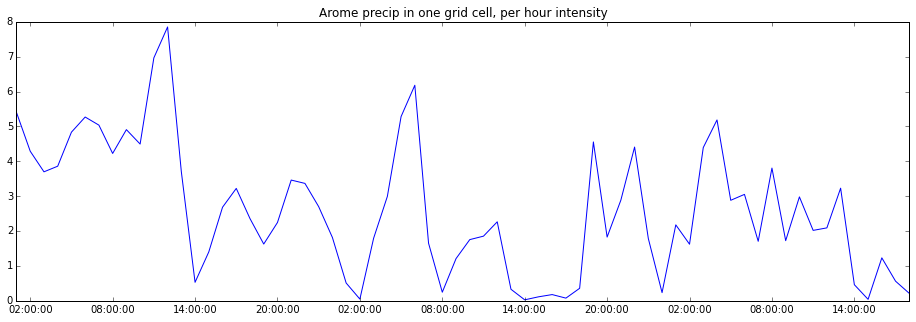

In [62]:
rainf_arome_int = np.diff(rainf_arome[:, 320, 182], axis=0)
# reduced by one element
plt.plot(time_arome[1:], rainf_arome_int)
plt.title("Arome precip in one grid cell, per hour intensity")

## Difference between precipitation from obs.grid and AROME

<matplotlib.colorbar.Colorbar instance at 0x0000000041FDD8C8>

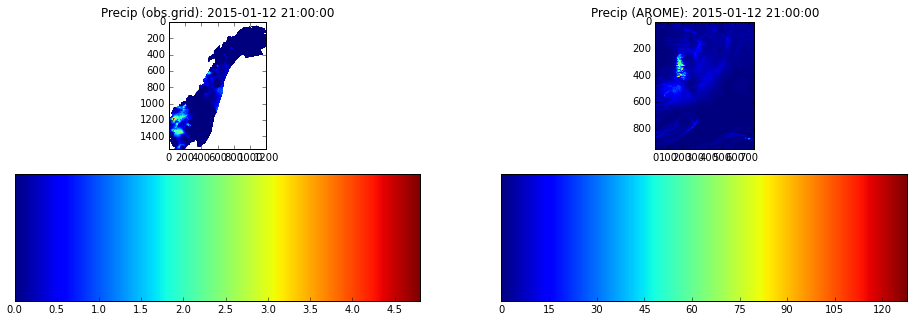

In [63]:
f, ([ax_obs, ax_aro], [ax_cobs, ax_caro]) = plt.subplots(2, 2)
im_obs = ax_obs.imshow(precip)
ax_obs.set_title("Precip (obs.grid): {0}".format(t_p))
plt.colorbar(im_obs, cax=ax_cobs, orientation="horizontal")
im_aro = ax_aro.imshow(rainf_arome[21, :, :])
ax_aro.set_title("Precip (AROME): {0}".format(time_arome[21]))
plt.colorbar(im_aro, cax=ax_caro, orientation="horizontal")

The precipitation in the obs.grid is per hour, while precipitation in the arome-data-file is accumulated over the modelling periode (66 hours). 

Is that regarded in following conversion process.

<matplotlib.colorbar.Colorbar instance at 0x00000000421EA388>

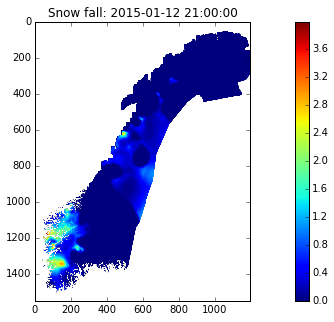

In [64]:
plt.figure()
plt.imshow(snowf)
plt.title("Snow fall: {0}".format(t_p))
plt.colorbar()

##Comparing snow-rain splitting

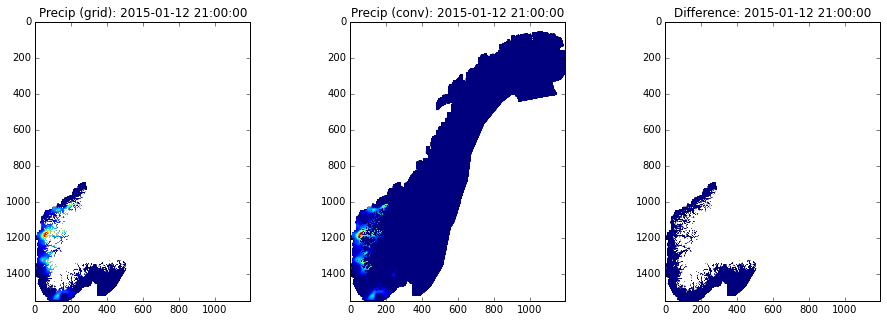

In [65]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(rainf)
ax1.set_title("Precip (grid): {0}".format(t_p))
ax2.imshow(snowrain)
ax2.set_title("Precip (conv): {0}".format(t_p))
ax3.imshow(diff)
ax3.set_title("Difference: {0}".format(t_p))

##Multifile datasets

In [66]:
precip_nc_mf = netCDF4.MFDataset(precip_mf)
precip_v_mf = precip_nc_mf.variables['precipitation_amount'] ## mm
precip = precip_v_mf[:].squeeze() #/ 3600.0
time_v_mf = precip_nc_mf.variables['time']
t_p_mf = netCDF4.num2date(time_v_mf[:], time_v_mf.units)

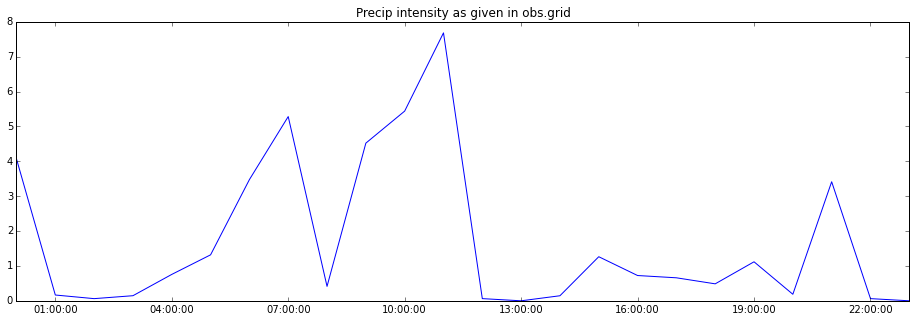

In [67]:
plt.figure()
plt.plot(t_p_mf, precip[:, Y, X])
plt.title("Precip intensity as given in obs.grid")

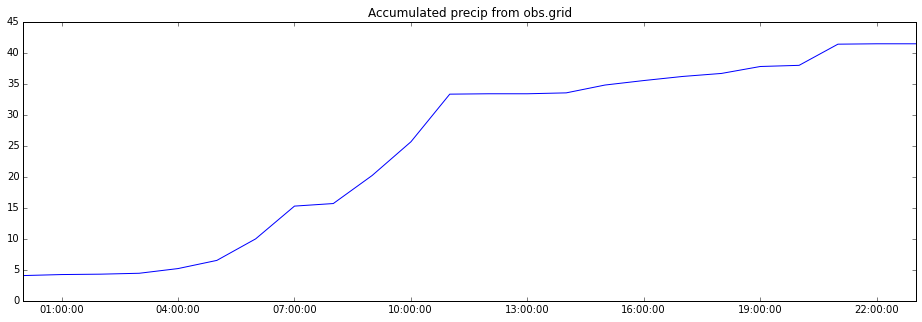

In [68]:
precip_acc = np.cumsum(precip[:, Y, X], axis=0)
plt.plot(t_p_mf, precip_acc)
plt.title("Accumulated precip from obs.grid")